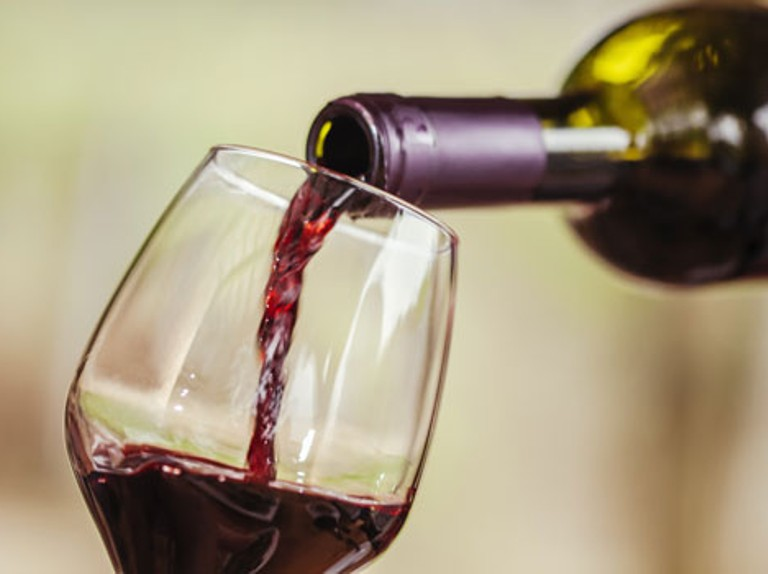

Dans ce notebook, nous analysons un dataset qui s'intéresse à différentes caractéristiques déterminant la qualité du vin rouge. Notre objectif est de construire un modèle de machine learning supervisé capable, à partir des différentes caractéristiques, de définir la qualité du vin rouge associé.

Pour cela nous allons: 
- dans un premier temps, étudier la globalité du dataset, en analysant la distribution des différentes variables. 
- Dans un second temps, comparer différents modèle de machine learning, qui seront entraînés à prédire la qualité du vin à partir des différentes caractéristiques, puis nous allons calculer leurs pourcentages de prédictions. Enfin, les différents scores obtenus seront comparés entre-eux afin de déterminer le modèle le plus adapté à prédire les données de cette étude.

# Première partie : Visualisation du dataset

## I - Importation et analyse du dataset 

In [3]:
# Importation des différentes librairies nécessaire à l'observation et à l'organisation du dataset : 
import pandas as pd 
import numpy as np

In [4]:
df_wine = pd.read_csv('/content/winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print('Le nombre de ligne du dataset est de {0}. Le nombre de colonne du dataset est de {1}.'.format(df_wine.shape[0], df_wine.shape[1]))

Le nombre de ligne du dataset est de 1599. Le nombre de colonne du dataset est de 12.


In [6]:
print(df_wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df_wine.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df_wine.isnull().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False          False             False        False           False      False                False                 False    False  False      False    False      1599
dtype: int64

Le dataset ne contient **aucune** donnée manquante. 

## II - Visualisation des données

Nous allons déterminer la distribution des différentes données du dataset puis comparer les caractéristiques avec la qualité du vin rouge.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

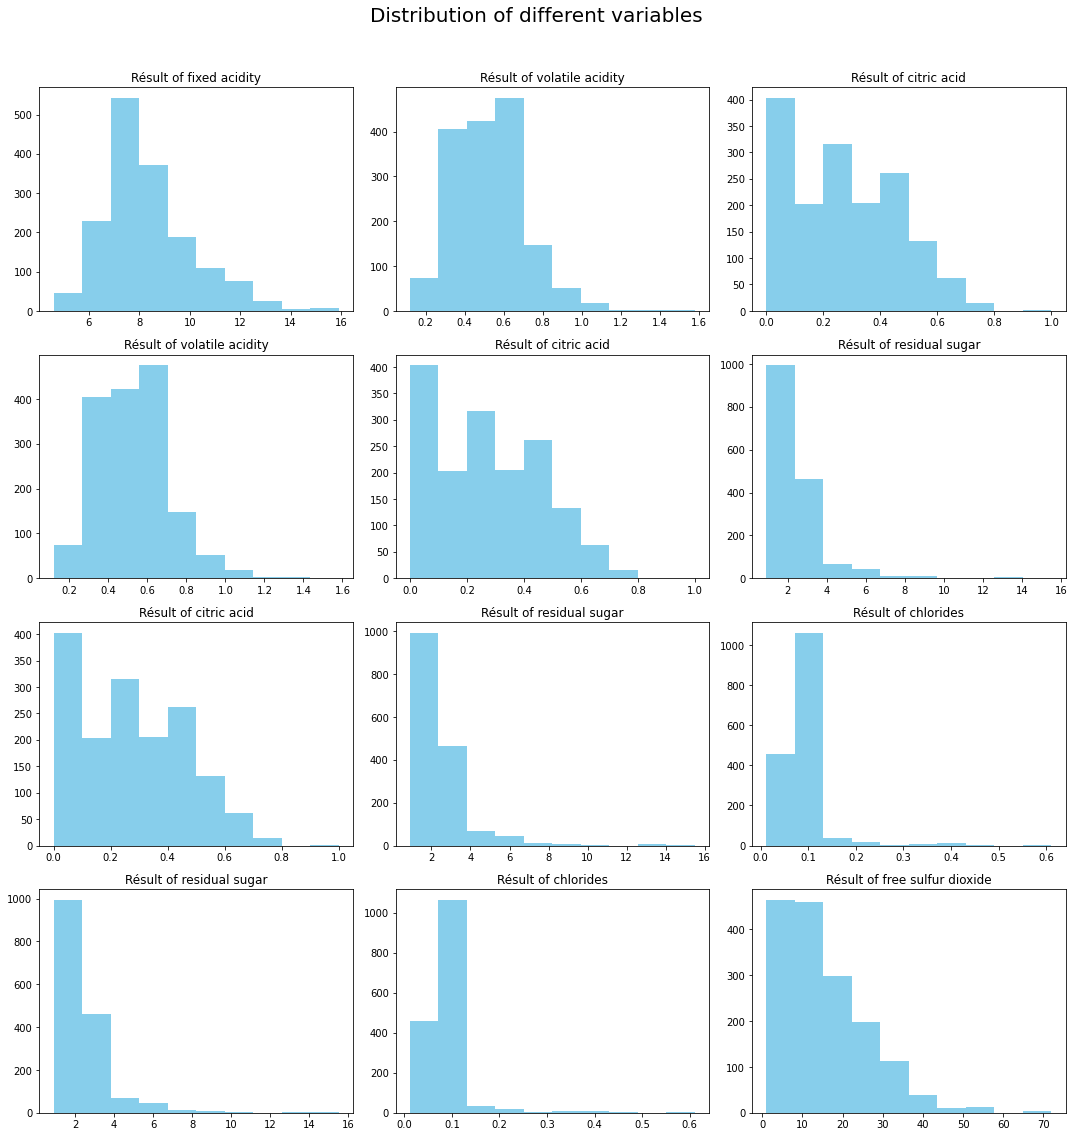

In [11]:
fig,ax = plt.subplots(4, 3, figsize = (15,15))
columns_df = list(df_wine.columns[0:11])

for x in range(4):
  for y in range(3):
    ax[x,y].hist(x = columns_df[x+y], data = df_wine, color = 'skyblue')
    ax[x,y].set_title("Résult of " + columns_df[x+y])
fig = plt.gcf()
fig.set_size_inches(15,15)
fig.tight_layout()
fig.suptitle("Distribution of different variables", fontsize = 20, x = 0.5, y = 1.05)
plt.show()

Ces différentes figures nous montrent la distribution des différentes variables du dataset. Par exemple, les valeurs de l'acide citrique sont comprises entre 0 et 0.8.

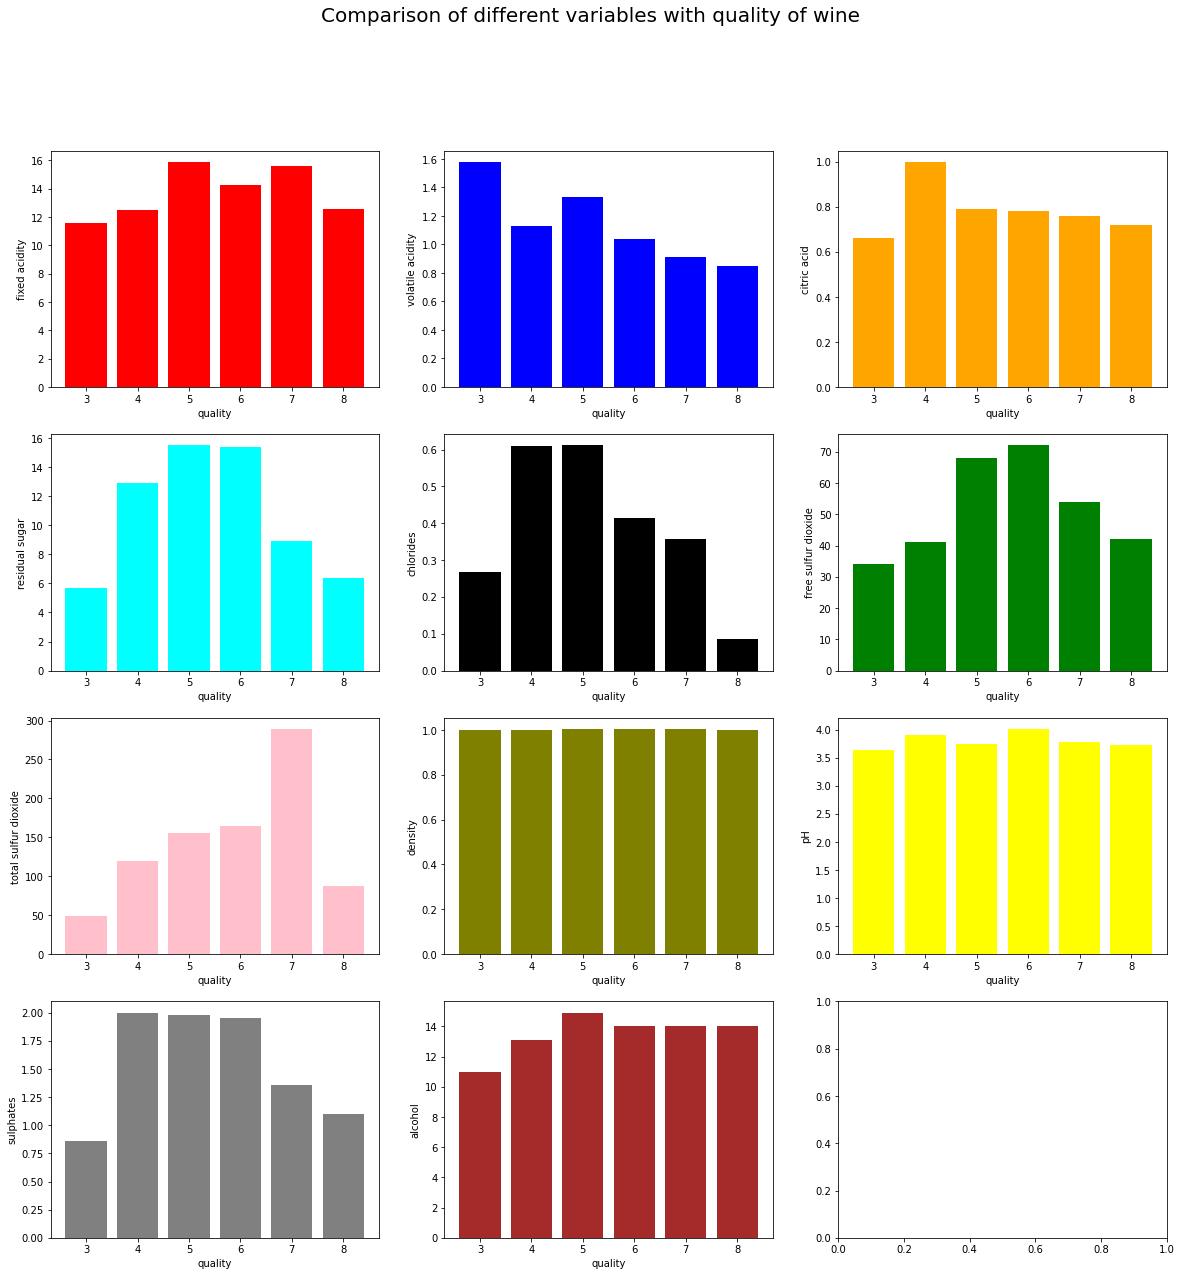

In [12]:
fig, ax = plt.subplots(4, 3, figsize=(15,15))
for i, axi in enumerate(ax.flat):
  couleur = ['red', 'blue', 'orange', 'cyan', 'black', 'green', 'pink', 'olive', 'yellow', 'grey', 'brown']
  if i != 11:
    axi.bar(df_wine.iloc[:,-1], df_wine.iloc[:,i],color = couleur[i])
    axi.set(xlabel= df_wine.columns[-1], ylabel = df_wine.columns[i])
fig.suptitle("Comparison of different variables with quality of wine", fontsize = 20)
plt.gcf().set_size_inches(20,20)
plt.show()

Nous montrons ici l'implication de chaque variables explicatives (ou caractéristiques) sur la variable cible (qualité du vin rouge). Cela nous donne une visualisation globale sur l'impact chaque composé sur la qualité.

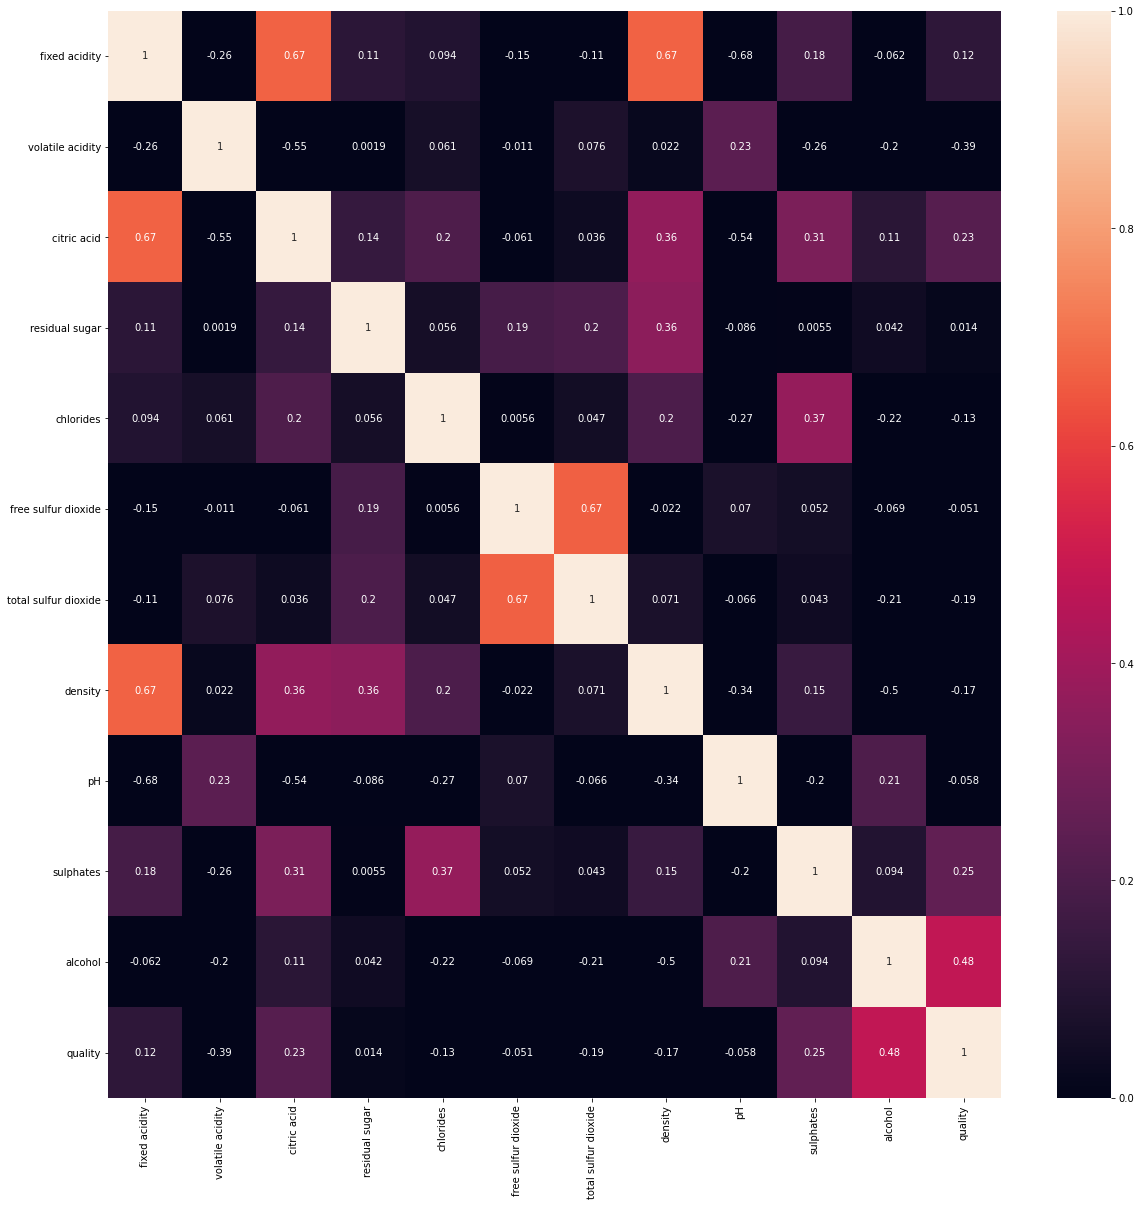

In [13]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df_wine.corr(), vmin = 0, vmax = 1, annot = True, ax=ax)
plt.show()

On détermine ici les différentes corrélations des différentes variables. Une matrice de corrélation évalue la dépendance de chaque variable entre elles. Par exemple, la variable densité aurait une corrélation avec l'acidité fixe.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


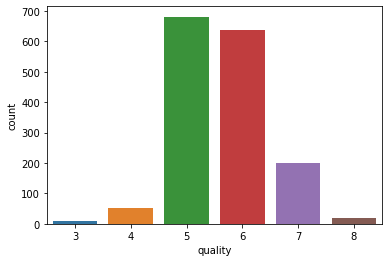

In [14]:
display(df_wine['quality'].value_counts())
sns.countplot(df_wine["quality"])

Après avoir analysé l'ensemble du dataset, nous voulons vérifier la dispersion de la variable cible, qui détermine la qualité du vin. 
Dans la dispertion des données cibles, nous retrouvons majoritairement des résultats entre 5 et 6. A l'inverse, nous avons peu de données correspondants à une qualité du vin à 3 ou à 8. Une dispersion non-homogène de la variable cible peut entraîner des difficultés à un modèle de s'entraîner.

# Deuxième partie : Machine Learning

Dans cette seconde partie, nous allons utiliser différents modèles supervisés, ceci afin de déterminer une corrélation entre nos variables descriptives (Acidité, sulfates, chloride...) et la qualité du vin. 
Nous allons comparer les résultats de prédiction des différents modèles entre eux pour déterminer quel modèle est capale de mieux prédire la qualité du vin en fonction des différents paramètres (variables descriptives).

## 1 - Régression linéaire

Le modèle de **régression linéaire** est le modèle le plus simple existant. A partir de nos variables X, le modèle va tracer une droite linéaire passant par le maximum de points. A partir de cette droite, il va ainsi essayer de déterminer une linéarité entre les variables explicatives (features) et la variable cible.

### A) Séparation des données cibles et descriptives

In [15]:
# Avant l'utilisation d'un modèle, nous séparons notre dataset en 2 parties : X correspondant à nos variables explicatives et Y à notre variable cible (celle que l'on veut prédire par nos modèles)
X = df_wine.iloc[:, 0:11]
Y = df_wine.iloc[:,-1]
print('Les données descriptifs X du dataset : ')
display(X)
print('')
print('Les données cibles Y du dataset : ')
display(Y)

Les données descriptifs X du dataset : 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2



Les données cibles Y du dataset : 


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### B) Préprocessing des variables descriptives et prédiction par le modèle linéaire

In [16]:
# Ici, nous utilisons une classe dans sklearn qui va permettre d'entraîner un échantillon train et prédire un échantillon de test. 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) # Nous prenons 70% des données pour l'entrainement et 30% pour la prédiction.

In [17]:
# Nos données descriptives doivent être mis à l'échelle. Pour cela, nous allons standardisé à l'aide de StandardScaler, une classe de sklearn : 
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Nous importons le modèle que nous voulons utilisé. Ici, il s'agit du modèle de regression linéaire: LinearRegression  
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Calcul du score (% des variables cibles prédites) à partir des variables explicatives à l'aide du modèle linéaire sur notre modèle d'entraînement :
lr.score(X_train, Y_train)

0.37096437294057627

In [20]:
# Calcul du score de l'échantillon à prédire à l'aide du modèle entraîner sur les échantillons X_train, X_test : 
lr.score(X_test, Y_test)

0.32071124343219515

Le modèle linéaire a prédit seulement 36% des valeurs de Y_train et 35% des valeurs de Y_test (à partir des données de X_train et de X_test).

In [21]:
# Nous déterminons les coefficients de correlation linéaire pour chaque variable explicative sur les variables cibles, à l'aide de l'attribut coef_ : 
coef_linear = pd.DataFrame(index = df_wine.columns[:-1], data = lr.coef_.transpose(), columns = ["coefficients"])
coef_linear = coef_linear.sort_values(by = "coefficients", ascending = False)
coef_linear

,coefficients
alcohol,0.284713
sulphates,0.152605
fixed acidity,0.035235
residual sugar,0.033016
free sulfur dioxide,0.021420
citric acid,-0.019179
density,-0.031759
pH,-0.061667
chlorides,-0.094044
total sulfur dioxide,-0.102877


Nous avons déterminer ici, pour chaque variable explicative, sa correlation linéaire avec la variable cible. Comprise entre -1 et 1, plus le coefficient se rapproche de ces deux valeurs extrèmes, plus la variable explicative est linéairement corrélé avec la qualité du vin.
Il semblerait que les données explicatives qui ont la plus forte influence sur la qualité du vin sont : Le taux d'alcoolémie, les sulphates, l'acidité volatile et le dioxyde de sulfure total.

In [22]:
model_lr = lr.score(X_test, Y_test)

**Conclusion** : Le modèle linéaire n'a réussi à prédire qu'environ 1/3 des variables cibles. Ce résultat est très faible mais attendus car le modèle de régression linéaire n'est pas un bon modèle pour prédire des variables cibles catégorielles. En effet, le principe du modèle est d'obtenir une linéarité entre les variables descriptives avec la variable cible.
Nous allons donc essayer d'utiliser un modèle plus adapté, capable de prédire des catégories.

## 2 - Regression logistique

Un modèle de **regression logistique** est plus adapté lorsque notre variable cible est catégorielle. Nous allons voir si ce modèle est capable de mieux prédire nos données qu'un modèle de régression linéaire.

In [23]:
X = df_wine.iloc[:, 0:11]
Y = df_wine.iloc[:,-1:]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state = 0)

In [25]:
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)
#On transforme les données de Y en numpy array à une liste unique.

In [26]:
# Les variables explicatives sont standardisés : 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# On importe le modèle de régression logistique dans sklearn : LogisticRegression 
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(max_iter = 150)
lor.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lor.score(X_train, Y_train)

0.6058981233243967

In [29]:
lor.score(X_test, Y_test)

0.6020833333333333

Le modèle de régression logistique a été capable de prédire environ 60% des valeurs de Y.

Afin de visualiser les données cibles prédites par rapport aux valeurs cibles réelles, nous allons utilisé une matrice de confusion : 

In [30]:
Y_train_pred = lor.predict(X_train)

In [31]:
Y_test_pred = lor.predict(X_test)

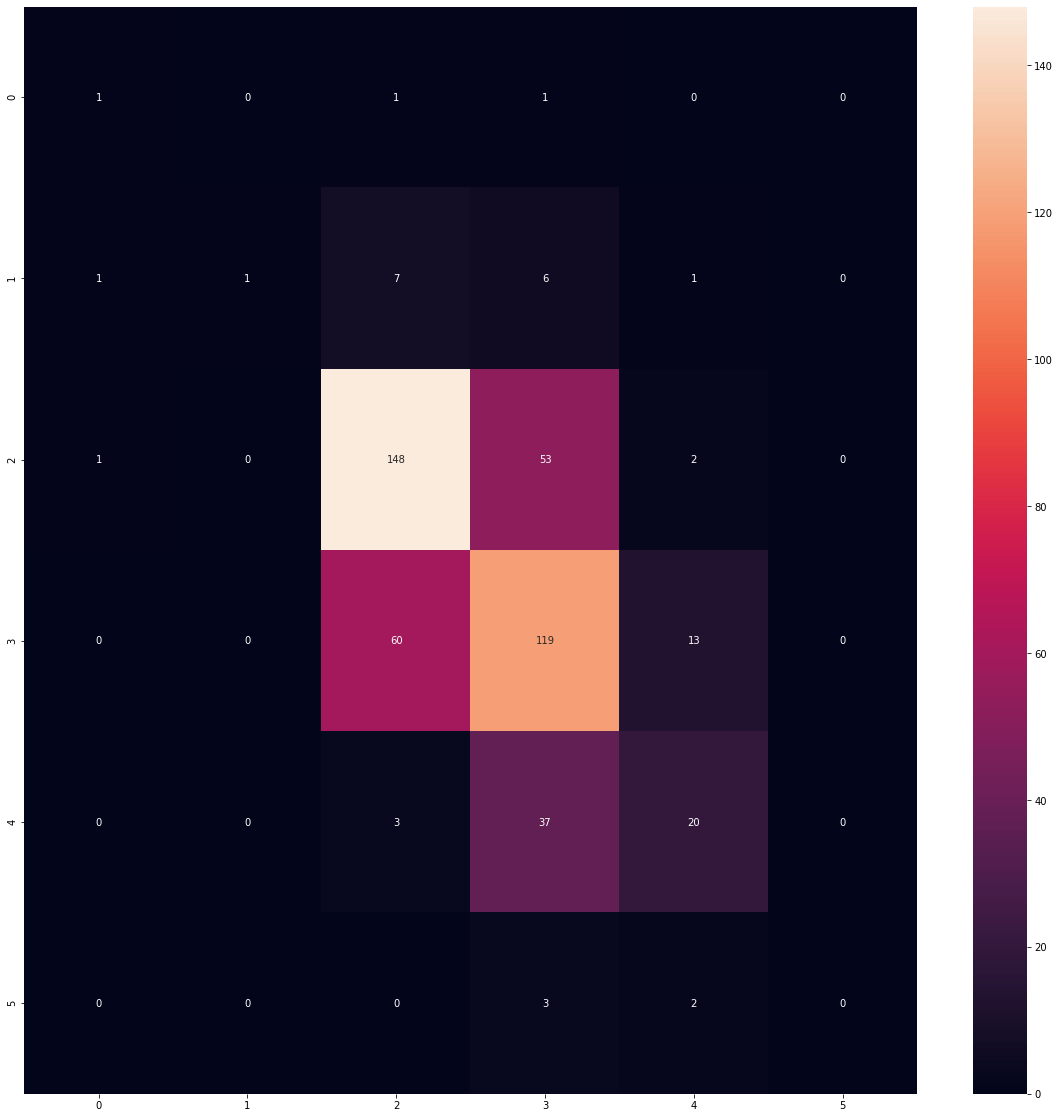

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_test_pred)
fig, ax = plt.subplots(figsize = (20,20))
# Visualisation de la matrice de confusion via seaborn : 
sns.heatmap(cm, annot=True, fmt="d", ax = ax)
plt.show(); 

Cette matrice de confusion nous donne le nombre de valeurs prédites par le modèle par rapport aux valeurs réelles. Nous observons par exemple que le modèle a bien prédit 148 fois une qualité du vin rouge à 5 (dans la matrice : 5 = 2) à l'aide des données issues des variables explicatives. A l'inverse, le modèle prédit 37 fois une qualité à 6 (dans la matrice : 3 = 6) alors que la valeur réelle était de 7 (dans la matrice : 4 = 7).

Afin d'optimiser l'entraînement du modèle, et d'analyser un eventuelle surapprentissage (ou overfitting), nous décidons d'utiliser une *cross-validation*, qui consiste à répartir les données en plusieurs parties et de les entraîner séparément :

In [33]:
from sklearn.model_selection import cross_val_score
print("Le score moyen, après cross validation, est de {}".format(cross_val_score(lor, X_train, Y_train).mean())) #Ici, le dataset est séparé en 5 parties.

Le score moyen, après cross validation, est de 0.5808856502242152


Le modèle, après *cross validation*, a prédit, en moyenne, seulement 58% des données de Y_train (alors que le modèle avait réussi à prédire 60,5%).

Après vérification de l'overfitting, nous voulons déterminer les réelles performances du modèle. Pour cela, nous allons utilisé le F1 score. Contrairement à l'accuracy, qui donne seulement la proportion de bonne prédiction par rapport à toutes les prédictions, le F1 score ne prend pas en compte, dans la prédiction, les vrais négatifs.

In [34]:
from sklearn.metrics import f1_score

In [35]:
print('Le F1 score du training set en logistic regression est :',f1_score(Y_train, Y_train_pred, average = 'micro'))
print('Le F1 score du test set en logistic regression est :',f1_score(Y_test,Y_test_pred, average = 'micro'))

Le F1 score du training set en logistic regression est : 0.6058981233243967
Le F1 score du test set en logistic regression est : 0.6020833333333333


Les résultats du F1 score est finalement similaire à celui obtenu par le modèle. 

In [36]:
model_lor = lor.score(X_test, Y_test)

**Conclusion** : Le modèle de régression logistique donne de meilleurs performances que le modèle de régression linéaire (avec 60% de bonnes prédictions contre 38%).

## 3 - Decision tree Classifiers

Le modèle "**Decision tree Classifiers**" est un modèle qui divise successivement l'ensemble des données pour déterminer leurs prévisions. A chaque division, il va sélectionner la variable ainsi que la valeur seuil (la valeur de X) qui permettent d'obtenir un sous-ensemble de données dans lesquels la variable cible sera aussi homogène que possible.

In [37]:
X = df_wine.iloc[:, 0:11]
Y = df_wine.iloc[:,-1]

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state = 0)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
display(dtc.score(X_train, Y_train))
display(dtc.score(X_test, Y_test))

1.0

0.5708333333333333

Ici, on se retrouve avec le phénomène **d'overfitting** c'est-à-dire un surapprentissage du modèle sur le Train mais beaucoup d'erreur de prédiction sur les données du Test. Pour corriger cela, nous decidons d'utiliser la cross-validation :

In [42]:
 from sklearn.model_selection import cross_val_score
print("Le score moyen, après cross validation, est de {}".format(cross_val_score(dtc, X_train, Y_train).mean()))

Le score moyen, après cross validation, est de 0.5460642216527867


Après cross-validation, on obtient un score de prédiction plus réaliste, avec 57% de prédiction par rapport aux 100% prédit précedemment. 

In [43]:
model_dtc = dtc.score(X_test, Y_test)

In [44]:
Y_test_pred = dtc.predict(X_test)

### Visualisation du résultat de prédiction du decision tree classifiers

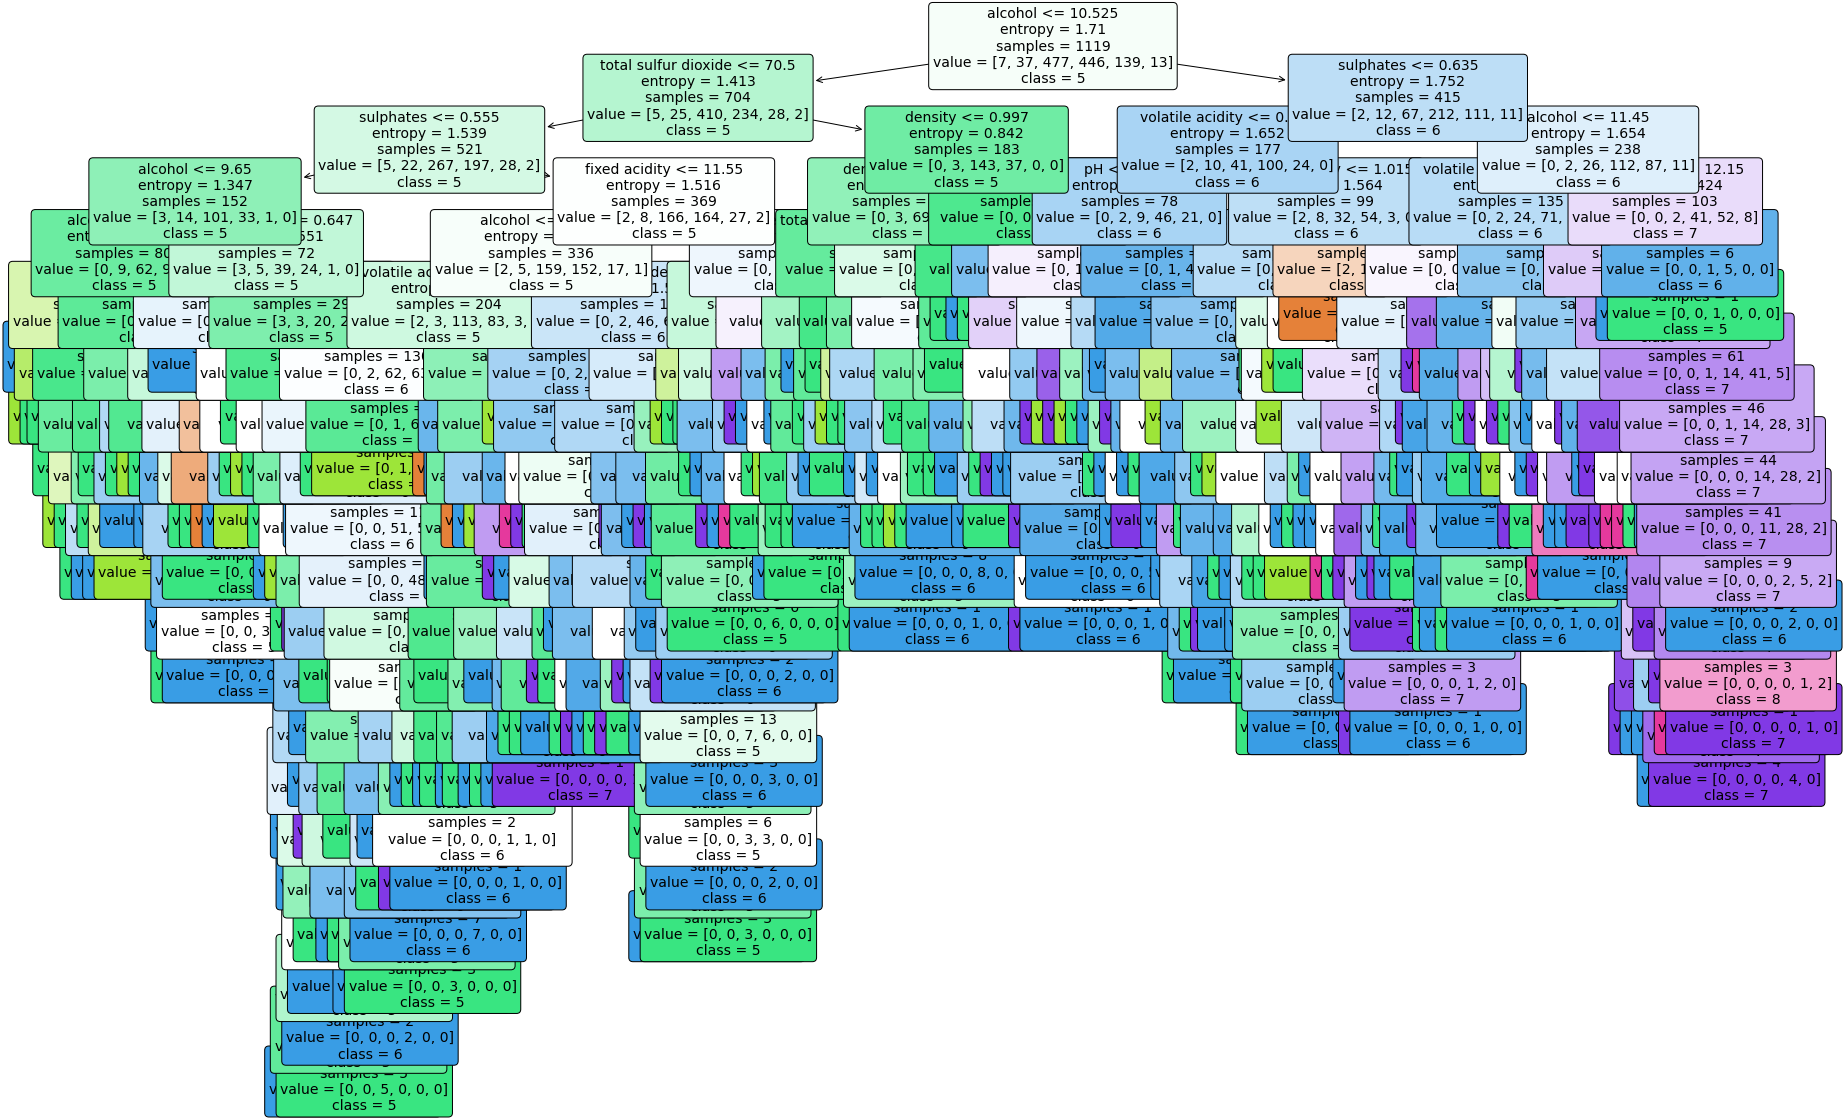

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
a = plot_tree(dtc, 
              feature_names=X.columns, 
              class_names=['3','4','5','6','7','8'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

Ce schémas nous montre comment le model "decision tree classifiers" a catégorisé les différentes cibles Y en fonction des différentes features X.

### Matrice de confusion entre les valeurs prédites et les valeurs réelles (Pour Decision Tree Classifiers)

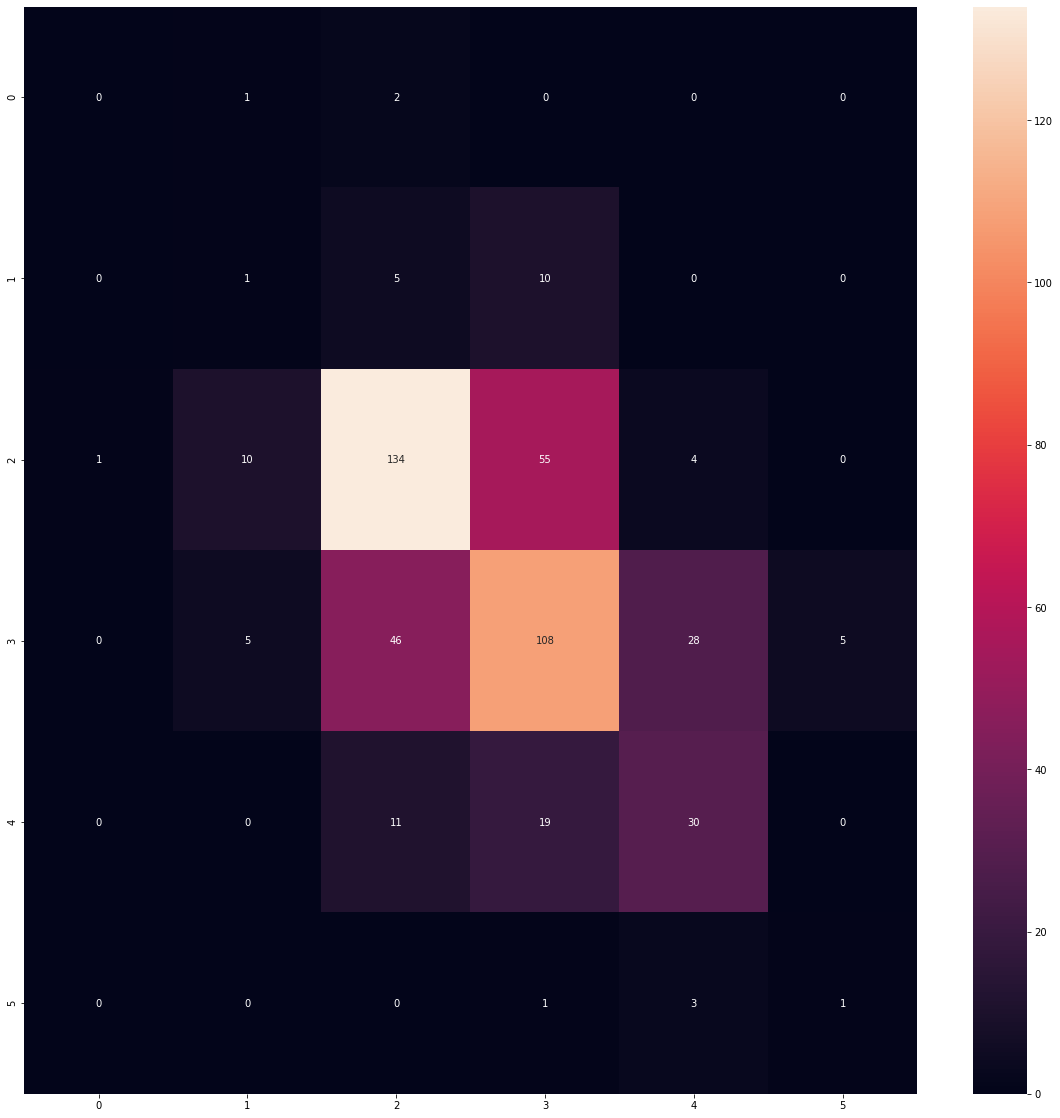

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_pred)
fig, ax = plt.subplots(figsize = (20,20))
# Visualisation de la matrice de confusion via seaborn : 
sns.heatmap(cm, annot=True, fmt="d", ax = ax)
plt.show()

**Conclusion** : Le modèle "decision tree classifiers" a été capable de prédire environ 57% des variables Y du test. Ce modèle est généralement très utilisé pour prédire des variables cibles catégorielles.

## 4 - Modèle SVM

Le modèle **SVM** est un modèle plus complexe que ceux utilisé précedemment. Il va cherché à déterminer des frontières les plus éloignées possibles des entre les différentes observations appartenants aux différentes variables cibles.

In [47]:
X = df_wine.iloc[:, 0:11]
Y = df_wine.iloc[:,-1]

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [50]:
from sklearn.svm import SVC
svm = SVC()

In [51]:
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
display(svm.score(X_train, Y_train))
display(svm.score(X_test, Y_test))

0.5102770330652369

0.5041666666666667

Le modèle SVM a prédit 51% des valeurs réelles de Y_train et 50% des valeurs de Y_test.
Afin d'améliorer les performances du modèle SVM, nous allons déterminer quel hyperparamètre permet de mieux prédire les données du dataset.

### Utilisation du GridSearchCV pour paramétrer les hyper-paramètres du modèle SVM

Le GridSearchCV est une classe dans sklearn qui va utiliser un modèle que l'on a sélectionné pour s'entraîner sur différents paramètres attribués. Pour chaque paramètre, il va établir un score. Après l'entraînement, le GridSearchCV peut nous donner les hyperparamètres du modèle qui donne le meilleur score de prédiction.

In [53]:
from sklearn.model_selection import GridSearchCV
grid_parametre = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]} # Sélection de différents hyperparamètres du SVM (C et gamma). Disponible ici : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [54]:
grid = GridSearchCV(svm, grid_parametre, verbose = 5)

In [55]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.478, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.527, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.446, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.482, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.502, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.482, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.527, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0005, score=0.478, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.496, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.543, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.469, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.536, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.473, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.509, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [56]:
grid.best_params_

{'C': 50, 'gamma': 0.0005}

Les hyperparamètres du SVM donnant les meilleures prédictions sont un C = 50 et gamma = 5e-4

In [57]:
svm_new = SVC(C = 50, gamma = 0.0005)
svm_new.fit(X_train, Y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
display(svm_new.score(X_train, Y_train))
display(svm_new.score(X_test, Y_test))

0.6041108132260947

0.5583333333333333

En modifiant les hyper-paramètres du modèle SVM, on obtient de meilleurs prédictions du modèle sur nos variables cibles. En revanche, nous observons une différence de prédiction de 5% entre nos données d'entraînement et nos données de test. Nous allons donc utilisé une cross-validation sur les données d'entraînement :

In [59]:
print("Le score moyen, après cross validation, est de {}".format(cross_val_score(svm_new, X_train, Y_train).mean()))

Le score moyen, après cross validation, est de 0.5791319666880206


Après cross-validation, le modèle a finalement diminué sa prédiction de 2% par rapport au précedent.

In [60]:
model_svm = svm_new.score(X_test, Y_test)

### Matrice de confusion entre les valeurs prédites et les valeurs réelles (Pour SVM)

In [61]:
Y_test_pred = svm_new.predict(X_test)

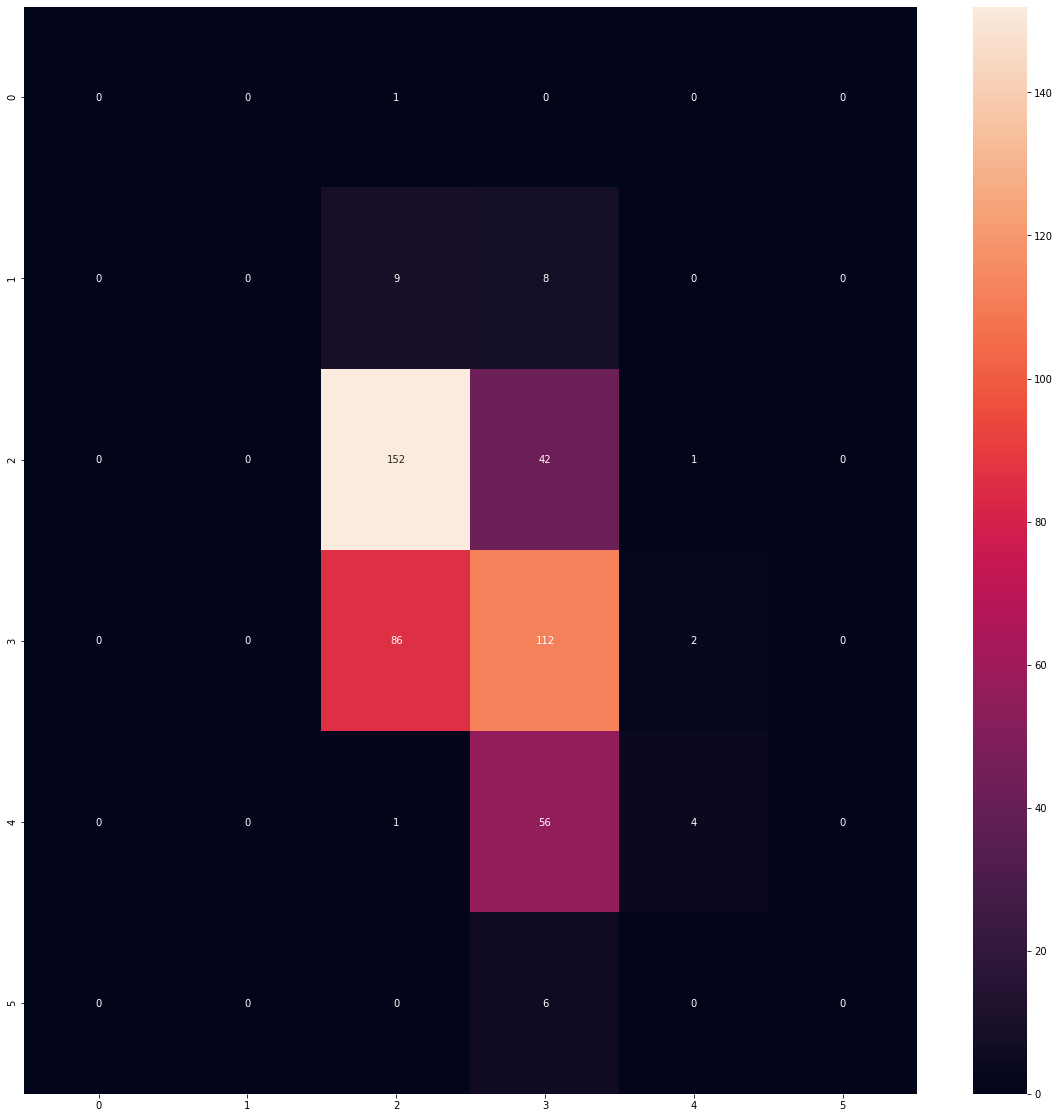

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_pred)
fig, ax = plt.subplots(figsize = (20,20))
# Visualisation de la matrice de confusion via seaborn : 
sns.heatmap(cm, annot=True, fmt="d", ax = ax)
plt.show()

**Conclusion** : En utilisant un modèle plus complèxe, nous obtenons un score de prédiction de 58% après l'optimisation des hyperparamètres. 

## 5 - Résultat final sur les prédictions des différents modèles

Nous allons enfin pouvoir comparer les résultats de prédictions des différents modèles que nous avons utilisé. Pour cela, nous allons comparer les scores obtenus des différents modèles sur le test.

In [63]:
final_pred = pd.DataFrame({'Les différents models utilisés': ['Régression linéaire', 'Régression logistique', 'Decision Tree Classifiers', 'SVM'], 'Résultats prédictions': [model_lr, model_lor, model_dtc, model_svm]})
final_pred

,Les différents models utilisés,Résultats prédictions
0,Régression linéaire,0.320711
1,Régression logistique,0.602083
2,Decision Tree Classifiers,0.570833
3,SVM,0.558333


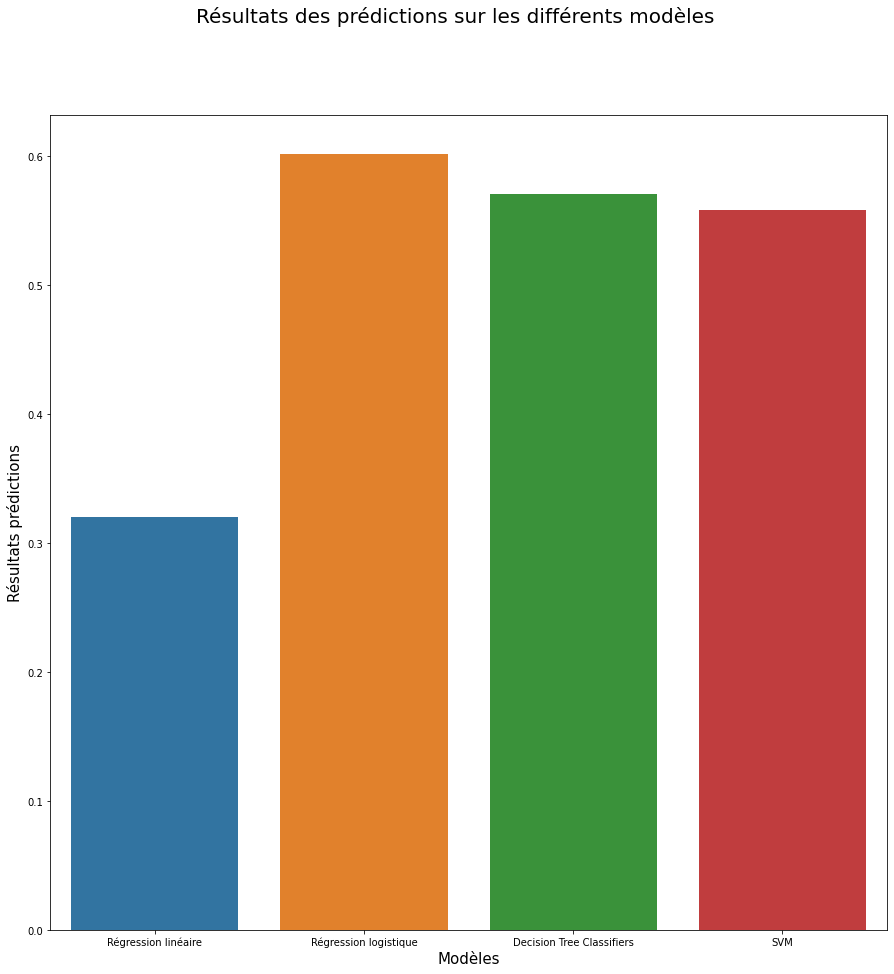

In [64]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = 'Les différents models utilisés', y= 'Résultats prédictions', data = final_pred, ax=ax)
fig.suptitle("Résultats des prédictions sur les différents modèles", size = 20)
plt.xlabel("Modèles", fontsize = 15)
plt.ylabel("Résultats prédictions", fontsize = 15)
plt.show();

D'après l'ensemble des résultats, nous voyons que le modèle ayant le plus prédit notre variable cible est le modèle de **régression logistique** (qui a réussi à prédire environ 60% des variables cibles) suivi du modèle **Decision Tree Classifiers** et **le SVM**. Ces 3 modèles sont idéales pour prédire des variables catégorielles, contrairement au modèle de **régression linéaire** qui prédit des données de type quantitatives continues. 

L'objectif de notre analyse n'était pas de produire le meilleur score possible, car des étapes supplémentaires de preprocessing sont nécessaires comme la suppression de certaines variables explicatives (ex: density) qui n'ont pas d'impact sur la variable cible. De plus, la dispertion de la variable cible n'était pas suffisemment homogène. Peut-être qu'une homogénéité de la variable cible aurait permi un meilleur score de prédiction.

Ici, nous voulons utiliser quelques modèles existants, comprendre leurs fonctionnements et déterminer celui qui est le plus approprié à la prédiction de nos données. 